<a href="https://colab.research.google.com/github/ErinaYoshida/kikagaku/blob/main/%E9%87%8D%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%902.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 外れ値除去+スケーリング+重回帰分析

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

### 1 データの読み込み

In [ ]:
df = pd.read_csv("/content/housing.csv")
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


### 2 外れ値除去　(3 $\sigma$法)

$$\mu-3\sigma \leq x \leq \mu + 3\sigma$$

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


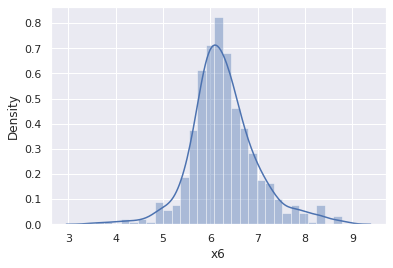

In [ ]:
sns.set()
sns.distplot(df["x6"])

In [ ]:
col = "x6"
mean = df.mean()
mean["x6"]

6.284634387351788

In [ ]:
# 標準偏差
sigma = df.std()
sigma[col]

0.7026171434153234

In [ ]:
low = mean[col] - 3 * sigma[col]
high = mean[col] + 3 * sigma[col]
df2 = df[(df[col] >= low) & (df[col] <= high)]
len(df), len(df2)

(506, 498)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


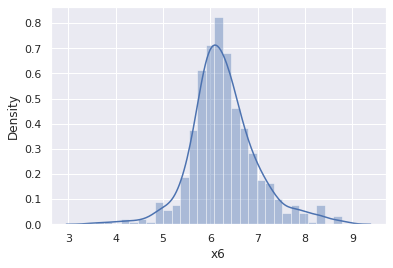

In [ ]:
sns.distplot(df[col])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


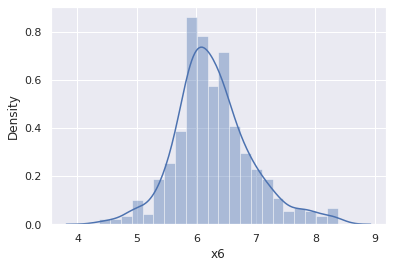

In [ ]:
sns.distplot(df2[col])

### 3 外れ値の除去(全変数)

In [ ]:
cols = df.columns

In [ ]:
_df = df
for col in cols:
  # 3σ法の上下限値を設定
  low = mean[col] - 3 * sigma[col]
  high = mean[col] + 3 * sigma[col]
  # 条件で絞込
  _df = _df[(_df[col] >= low) & (df[col] <= high)]
  print(col, len(_df))

x1 498
x2 484
x3 484
x4 450
x5 450
x6 443
x7 443
x8 439
x9 439
x10 439
x11 439
x12 417
x13 415
y 415


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boole

In [ ]:
len(df)

506

In [ ]:
len(_df)

415

モデルの精度を上げるために
・3σ法で外れ値を取り除く　←データがかなり減ってしまうかも
・外れ値を平均、中央値で補完する
・主成分分析等を使って、潜在変数に変換後、3σ法適用

### モデル構築

In [ ]:
_df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [ ]:
# 入力変数と出力変数に切り分け
x = _df.drop("y", axis=1)
t = _df["y"]

In [ ]:
# 訓練データと検証データに分割
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.4, random_state=1)

In [ ]:
# 重回帰分析
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, t_train)

In [ ]:
# 検証(訓練データ)
model.score(x_train, t_train)

0.7972109224535133

In [ ]:
# 検証(検証データ)
model.score(x_test, t_test)

0.6253776004329593

### 過学習(オーバーフィッティング)
訓練データに適応しすぎて未知の検証データへの予測精度が下がってしまっている


### スケーリングを考慮した重回帰分析

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# インスタンス化
scaler = StandardScaler()

In [ ]:
# scalerの学習(平均と標準偏差の算出)
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# scaling
x_train2 = scaler.transform(x_train)
x_test2 = scaler.transform(x_test)

In [ ]:
# モデルの学習
model = LinearRegression().fit(x_train2, t_train)

In [ ]:
# モデルの検証(訓練データ)
model.score(x_train2, t_train)

0.7972109224535133

In [ ]:
# モデルの検証(検証データ)
model.score(x_test2, t_test)

0.6253776004329598

### scalingする前と訓練データ・検証データ共に検証した値が同じ
重回帰分析は標準化によって精度が変わる手法ではない
しかし、scalingすることで各変数がどのくらい影響を与えているか説明力が増す

In [ ]:
# パラメータの確認
model.coef_

array([-0.19542642,  0.21154333,  0.50827735,  0.        , -1.21336016,
        3.91986658, -0.36986122, -1.85711554,  1.16625182, -1.52855186,
       -1.8725663 ,  0.24442708, -2.76100147])

In [36]:
x.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13'],
      dtype='object')

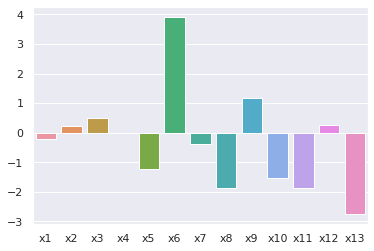

In [39]:
# パラメータの可視化
sns.barplot(x=x.columns, y=model.coef_)